In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-12-23 07:12:40--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-12-23 07:12:40 (57.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
data.size

324

In [7]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

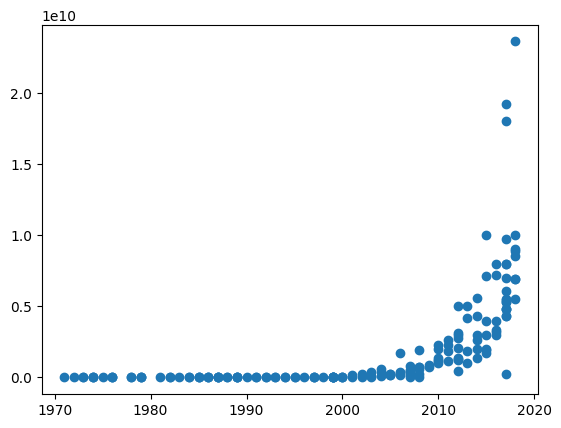

In [8]:
plt.scatter(X,Y)

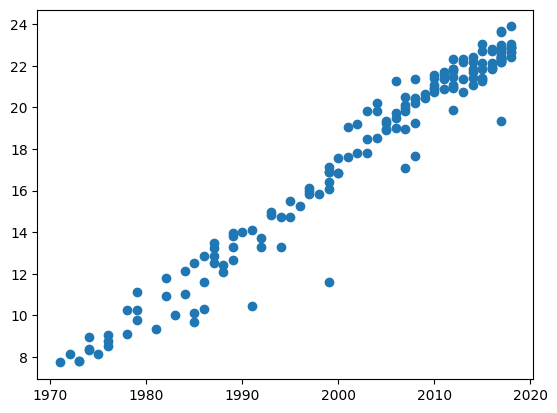

In [9]:
Y = np.log(Y)
plt.scatter(X,Y)

In [10]:
X = X - X.mean()

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [13]:
def schedule(epoch, lr):
  if epoch > 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [14]:
r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 372.1635 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 307.9883 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 305.9489 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 290.0678 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 186.5542 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 132.7224 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 98.0983 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 66.8049 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 106.8710 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 104.3194 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss:

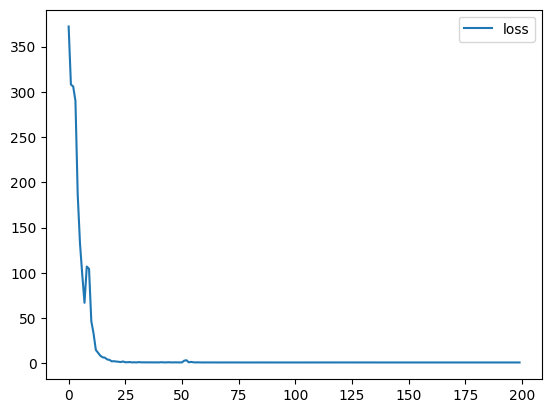

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

## Making predictions

6/6 [==============================] - 0s 1ms/step


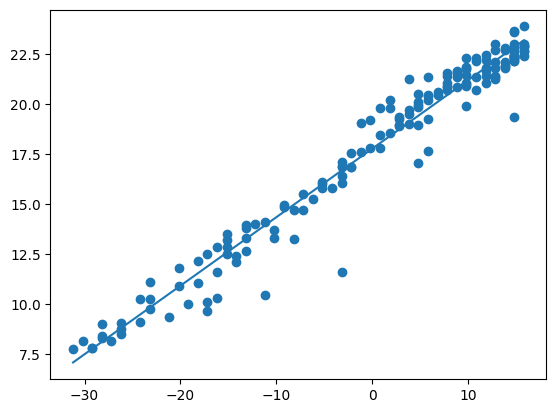

In [17]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)